In [35]:
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Task 1: Load the dataset into a Pandas DataFrame and examine the first few rows.
shooting_dataset = read_csv("shooting-1982-2023.csv")
shooting_dataframe = DataFrame(shooting_dataset)
shooting_dataframe.columns


Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'latitude', 'longitude', 'type',
       'year'],
      dtype='object')

In [4]:
# Task 2: Check the dimensions of the dataset (number of rows and columns).
shooting_dataframe.shape

(141, 21)

In [5]:
# Task 3: Identify and handle missing values in the dataset.

shooting_dataframe.isnull()
shooting_dataframe.dropna()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Nashville religious school shooting,"Nashville, TN",3-27-23,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28,-,...,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,"F (identified as transgender, per police)",-,-,Mass,2023
1,Michigan State University shooting,"East Lansing, Michigan",2-13-23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,...,yes,-,semiautomatic handguns,-,Black,M,-,-,Mass,2023
2,Half Moon Bay spree shooting,"Half Moon Bay, California",1-23-23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,-,...,-,-,semiautomatic handgun,-,Asian,M,-,-,Spree,2023
3,LA dance studio mass shooting,"Monterey Park, California",1-21-23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,yes,...,-,-,semiautomatic assault weapon (Details pending),-,Asian,M,-,-,Mass,2023
4,Virginia Walmart shooting,"Chesapeake, Virginia",11-22-22,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31,-,...,-,-,semiautomatic handgun,-,Black,M,-,-,Mass,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Shopping centers spree killings,"Palm Bay, Florida",23-04-1987,"Retired librarian William Cruse, 59, was paran...",6,14,20,Other,59,Yes,...,Yes,"Gun store in Norwood, Ohio; The Oaks Trading P...","One rifle, one revolver, one shotgun","Sturm, Ruger Mini-14 semiautomatic rifle; 20-g...",white,Male,28.0331886,-80.6429695,Spree,1987
137,United States Postal Service shooting,"Edmond, Oklahoma",20-08-1986,"Postal worker Patrick Sherrill, 44, opened fir...",15,6,21,Workplace,44,Unclear,...,Yes,"Issued by Oklahoma National Guard, where Sherr...",Three semiautomatic handguns,".22-caliber, two .45-caliber Colt Model 1911-A...",white,Male,35.6672015,-97.42937037,Mass,1986
138,San Ysidro McDonald's massacre,"San Ysidro, California",18-07-1984,"James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,41,Yes,...,Yes,Unknown,"One semiautomatic handgun, one rifle (assault)...",9mm Browning P35 Hi-Power semiautomatic handgu...,white,Male,32.5520013,-117.0430813,Mass,1984
139,Dallas nightclub shooting,"Dallas, Texas",29-06-1984,"Abdelkrim Belachheb, 39, opened fire at an ups...",6,1,7,Other,39,Yes,...,No,"Hines Boulevard Pawn Shop in Dallas, Texas",One semiautomatic handgun,9mm Smith & Wesson 459 semiautomatic handgun,white,Male,32.925166,-96.838676,Mass,1984


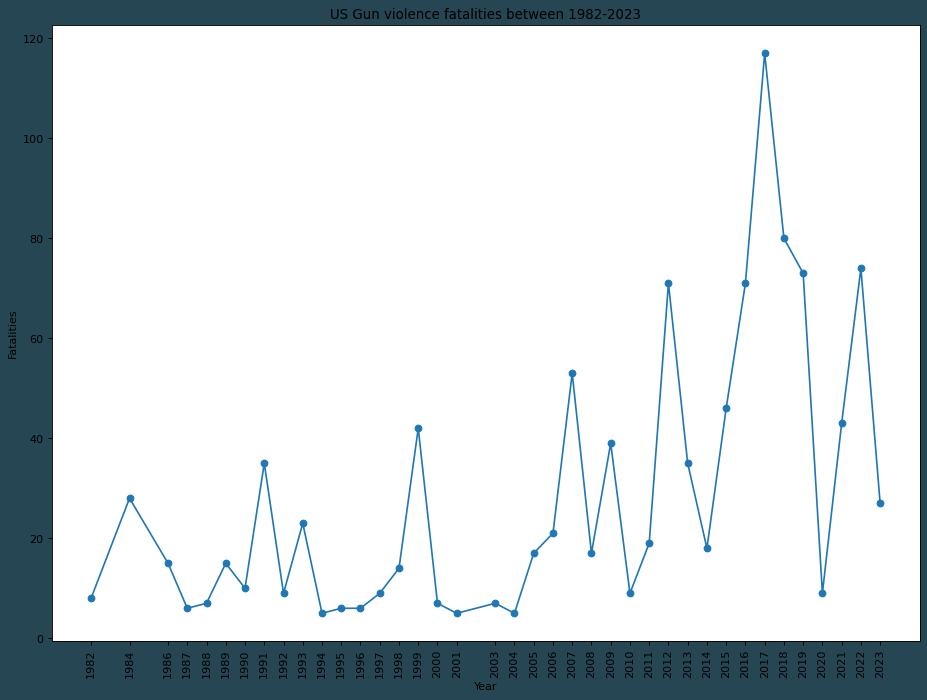

In [6]:
# Task 4: Analyze the distribution of gun violence incidents over the years using a line plot.
incidents_over_years = shooting_dataframe.groupby("year").sum()

plt.figure(figsize=(14, 10), dpi=80, facecolor="#264653")
plt.title("US Gun violence fatalities between 1982-2023")
plt.xlabel("Year")
plt.ylabel("Fatalities")
plt.xticks(incidents_over_years.index, rotation=90)
plt.plot(incidents_over_years.index, incidents_over_years["fatalities"])
plt.scatter(incidents_over_years.index, incidents_over_years["fatalities"])
# use this code to save the image
plt.savefig("US Gun violence fatalities between 1982-2023.png")
# instead of this 
# plt.savefig("US Gun Violence", format="PNG")
plt.show()

In [7]:
# Task 5: Calculate the total number of fatalities and injuries caused by mass shootings.
total_fatalities = shooting_dataframe.groupby("type").sum()["fatalities"].loc["Mass"]
print(f"Total fatalities between 1982-2023 caused by mass shooting is {total_fatalities}")

shooting_dataframe["injured"] = to_numeric(arg=shooting_dataframe["injured"], errors="coerce")
shooting_dataframe["injured"].fillna(5, inplace=True)
shooting_dataframe["injured"] = shooting_dataframe["injured"].astype(int)
total_injuries = shooting_dataframe[["type", "injured"]].groupby("type").sum()["injured"].loc["Mass"]
print(f"Total injuries between 1982-2023 caused by mass shooting is {total_injuries}")



Total fatalities between 1982-2023 caused by mass shooting is 975
Total injuries between 1982-2023 caused by mass shooting is 1418


C:\Users\jemil\AppData\Local\Temp\ipykernel_13756\4033373761.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shooting_dataframe["injured"].fillna(5, inplace=True)


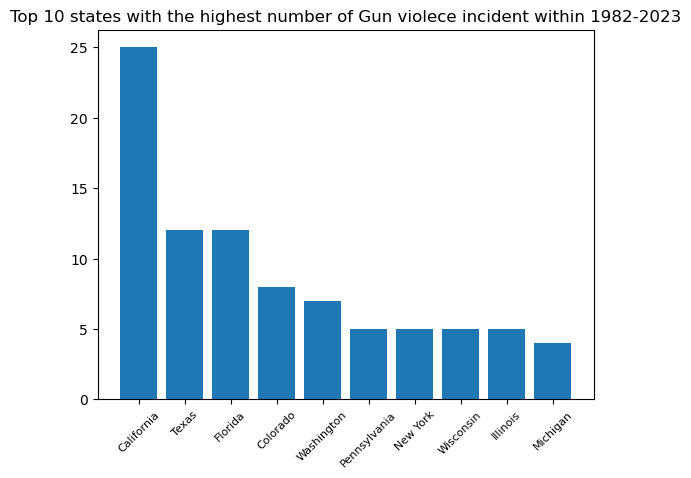

In [15]:
# Task 6: Visualize the top 10 states with the highest number of incidents using a bar chart.
state = shooting_dataframe["location"].str.split(",").str[-1].str.strip()
shooting_dataframe.insert(2, "State", state)
incidents_per_state = shooting_dataframe["State"].value_counts().head(10)
plt.bar(incidents_per_state.index, incidents_per_state)
plt.title("Top 10 states with the highest number of Gun violece incident within 1982-2023")
plt.xticks(fontsize=8, rotation=45)
# use this code to save the image
plt.savefig("Top 10 states with the highest number of Gun violece incident within 1982-2023.png")
# instead of this !
# plt.savefig("Top 10 states with the highest number of Gun violece incident within 1982-2023", format="PNG")
plt.show()

In [16]:
# task 7 :
location_with_highest_incident = shooting_dataframe["location"].value_counts()
print(f"Location with highest incident is {location_with_highest_incident}")

Location with highest incident is location
Colorado Springs, Colorado    3
San Francisco, California     2
Dallas, Texas                 2
Orange, California            2
Orlando, Florida              2
                             ..
Cincinnati, Ohio              1
Bakersfield, California       1
Perryman, Maryland            1
Pittsburgh, Pennsylvania      1
Miami, Florida                1
Name: count, Length: 130, dtype: int64


In [36]:
avg_fatalities = shooting_dataframe["fatalities"].mean()
avg_injuries = pd.to_numeric(shooting_dataframe["injured"], errors='coerce').mean(skipna=True)

print(f"The average fatalities due to gun violence between 1982-2023 is {avg_fatalities}")
print(f"The average injuries due to gun violence between 1982-2023 is {avg_injuries}")

The average fatalities due to gun violence between 1982-2023 is 7.808510638297872
The average injuries due to gun violence between 1982-2023 is 11.285714285714286


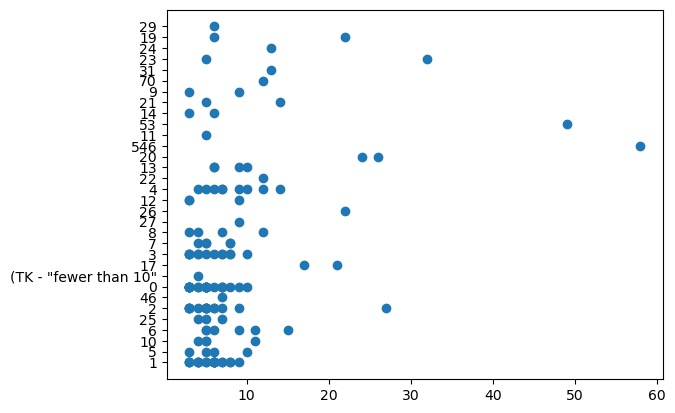

In [37]:
fatalities = shooting_dataframe["fatalities"]
injuries = shooting_dataframe["injured"]

plt.scatter(fatalities, injuries)
plt.show()

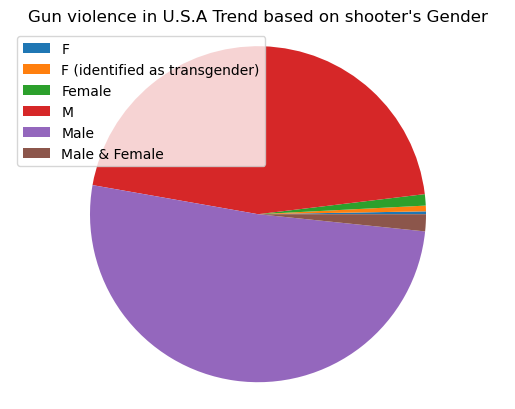

In [38]:
fatalities = shooting_dataframe.groupby("gender").sum()["fatalities"]
labels = ['F', 'F (identified as transgender)', 'Female', 'M', 'Male', 'Male & Female']
plt.pie(fatalities)
plt.title("Gun violence in U.S.A Trend based on shooter's Gender")
plt.axis("equal")
plt.legend(labels, loc="upper left")
# use this code to save the image
plt.savefig("US Gun violence in U.S.A Trend based on shooter's Gender.png")
# instead of this below!
# plt.savefig("Gun violence in U.S.A Trend based on shooter's Gender", format="PNG")
plt.show()